In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
df=pd.read_csv('/content/matches_by_teams.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10594 entries, 0 to 10593
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   match_id                            10594 non-null  object 
 1   color                               10594 non-null  object 
 2   team_id                             10594 non-null  object 
 3   team_slug                           10594 non-null  object 
 4   team_name                           10594 non-null  object 
 5   team_region                         10587 non-null  object 
 6   core_shots                          8708 non-null   float64
 7   core_goals                          8708 non-null   float64
 8   core_saves                          8708 non-null   float64
 9   core_assists                        8708 non-null   float64
 10  core_score                          8708 non-null   float64
 11  core_shooting_percentage            8708 

In [22]:
df.shape

(10594, 54)

In [23]:
df.describe()

,core_shots,core_goals,core_saves,core_assists,core_score,core_shooting_percentage,boost_bpm,boost_bcpm,boost_avg_amount,boost_amount_collected,...,positioning_time_defensive_third,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,score
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8662.000000,8662.000000,8662.000000,8662.000000,...,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,10594.000000
mean,32.892627,8.611162,18.616789,6.660083,4479.210955,26.272498,4956.776495,5094.132753,594.833405,29850.455668,...,2108.627773,1426.248274,896.853365,2870.532147,1561.190065,3195.871437,1235.857788,12.534172,12.534519,2.010100
std,11.854757,4.159220,7.712327,3.464000,1328.741128,10.071627,1341.123600,1366.757837,155.269014,8448.187051,...,598.909267,395.757670,272.628067,795.544468,456.575212,876.838346,335.737386,5.999051,5.999184,1.296792
min,3.000000,0.000000,1.000000,0.000000,549.000000,0.000000,1150.000000,1173.622500,133.260000,6999.000000,...,517.190000,309.660000,179.280000,711.430000,313.520000,747.030000,245.630000,0.000000,0.000000,0.000000
25%,25.000000,6.000000,13.000000,4.000000,3542.750000,19.354839,3756.000000,3874.258502,452.377500,22584.000000,...,1643.410000,1088.025000,701.512500,2212.640000,1225.040000,2406.890000,976.377500,8.000000,8.000000,1.000000
50%,32.000000,8.000000,18.000000,6.000000,4387.000000,25.714286,4846.000000,4975.988725,582.320000,28808.500000,...,2045.335000,1374.995000,869.715000,2777.705000,1510.725000,3075.805000,1196.510000,12.000000,12.000000,3.000000
75%,40.000000,11.000000,23.000000,9.000000,5288.000000,32.432432,5920.750000,6085.428042,711.932500,35241.750000,...,2485.620000,1681.532500,1062.515000,3386.245000,1840.857500,3772.175000,1453.705000,16.000000,16.000000,3.000000
max,91.000000,34.000000,61.000000,28.000000,10307.000000,72.727273,9941.000000,10089.656910,1127.260000,68261.000000,...,4644.500000,3067.160000,2080.690000,6299.460000,3478.620000,7102.870000,2693.200000,45.000000,45.000000,4.000000


**Dropping unnecessary columns**
The following columns have no importance interms of data analysis purposes


*   Match ID -> A unique ID generated for each match.
*   Octane GG Team ID-> A unique ID given to team as per octane.gg
*   Team_slug -> Each Team's respective profile in octane.gg



In [24]:
# df.drop(df.columns[[0, 2, 3]], axis=1, inplace=True)
# df.info()

Visual Analysis

DIVIDING? per events


NULL VALUES

In [25]:
df.isnull().sum()

match_id                                 0
color                                    0
team_id                                  0
team_slug                                0
team_name                                0
team_region                              7
core_shots                            1886
core_goals                            1886
core_saves                            1886
core_assists                          1886
core_score                            1886
core_shooting_percentage              1886
boost_bpm                             1932
boost_bcpm                            1932
boost_avg_amount                      1932
boost_amount_collected                1932
boost_amount_stolen                   1932
boost_amount_collected_big            1932
boost_amount_stolen_big               1932
boost_amount_collected_small          1932
boost_amount_stolen_small             1932
boost_count_collected_big             1932
boost_count_stolen_big                1932
boost_count

**FALL SPLIT MAJOR**

Use a global constant to fill in the missing value.

Clustering by regions

MinMax



```
# This is formatted as code
```

Matches played vs wins

No. of games across each region



Data Discretization

Unique Teams

Meta per region

In [26]:
#REPLACING REGION NULL VALUES
x=df['team_id']
y=df['team_region']
tar= pd.concat([x,y], join = 'outer', axis = 1)
info=dict(tar.to_numpy())
print(info["6020bc8ef1e4807cc700391a"])
coords=list(np.where(pd.isnull(df.iloc[:,5])))
# df.at[coords[0][1],'team_name']="bruh"
for i in coords[0]:
  df.at[i,'team_region']=info[df.at[i,'team_id']]
df['team_region'].isnull().sum()

Oceania


0

In [27]:
matches = df['match_id']
print(matches.unique())

['6159ad3d143c37878b2384a9' '6159ad3d143c37878b2384aa'
 '6159ad3d143c37878b2384ab' ... '62e02371da9d7ca1c7bb2f61'
 '62e02371da9d7ca1c7bb2f62' '62e02371da9d7ca1c7bb2f63']


759


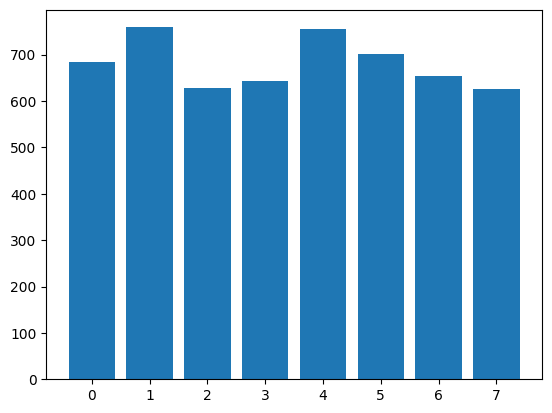

[685, 759, 627, 644, 755, 701, 653, 625]


In [28]:
#MATCHES PLAYED BY REGION :>
#DO IT
regs = df.iloc[:, 5]
ocean=df.loc[df['team_region'] == 'North America']
print(ocean['match_id'].unique().size)
mat=[]
for i in regs.unique():
  ocean=df.loc[df['team_region'] == i]
  mat.append(ocean['match_id'].unique().size)

plt.bar(range(0,regs.unique().size),mat)
plt.show()
print(mat)

In [29]:
#EU REGION
eu=df.loc[df['team_region'] == 'Europe']
# eu.to_csv('eu.csv')

#SPLIT EVENT BY EVENT
# """
# FALL 
#   REG 1
#      Inv,closed,main
# """


In [30]:
#GIVING EVENT TO EU
df2=pd.read_csv('/content/main.csv')
x=df2['event']
y=df2['match_id']
edr= pd.concat([y,x], join = 'outer', axis = 1)
eve=dict(edr.to_numpy())
mode=[]
for i in eu['match_id']:
  mode.append(eve[i])
print(mode)

column_values = pd.Series(mode)
print(len(column_values))
column_values.isna().sum()

eu.insert(loc=0, column='Mode', value=column_values,allow_duplicates = True)
print(eu.head())
# eu.insert(0,splits,True)
# print(len(eu['Mode']))
# mode
# id=eu.at[0,'match_id']
# id

['Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regional 1', 'Regi

In [31]:
mode=[]
for i in df['match_id']:
  mode.append(eve[i])
df['Mode'] = mode
df.head()
df.to_csv('preprocessed_matches_by_teams.csv')

In [36]:
eu.head()

,Mode,match_id,color,team_id,team_slug,team_name,team_region,core_shots,core_goals,core_saves,...,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,score,winner
660,Regional 1,6160626af8090ec745286fe6,blue,6020bd98f1e4807cc700dc74,https://octane.gg/teams/dc74-team-bds,TEAM BDS,Europe,32.0,12.0,10.0,...,1077.75,765.41,1897.49,1293.56,2467.60,723.44,8.0,9.0,3.0,True
661,Regional 1,6160626af8090ec745286fe6,orange,6074990c8c85ced5f379e9e0,https://octane.gg/teams/e9e0-bs-competition,BS+COMPETITION,Europe,16.0,4.0,15.0,...,975.02,505.95,2255.54,939.43,2168.24,1026.73,9.0,8.0,0.0,False
662,Regional 1,6160626af8090ec745286fe7,blue,6020c370f1e4807cc702fc9c,https://octane.gg/teams/fc9c-team-vitality,TEAM VITALITY,Europe,37.0,9.0,17.0,...,1938.59,1110.95,3680.79,2000.61,4338.66,1342.76,14.0,21.0,3.0,True
663,Regional 1,6160626af8090ec745286fe7,orange,613b735bf8090ec7452851a8,https://octane.gg/teams/51a8-00-nation,00 NATION,Europe,30.0,8.0,22.0,...,1865.92,1001.15,3847.16,1855.03,4115.78,1586.38,21.0,14.0,2.0,False
664,Regional 1,6160626af8090ec745286fe8,blue,60fbc5b887f814e9fbffdcbd,https://octane.gg/teams/dcbd-karmine-corp,KARMINE CORP,Europe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,True


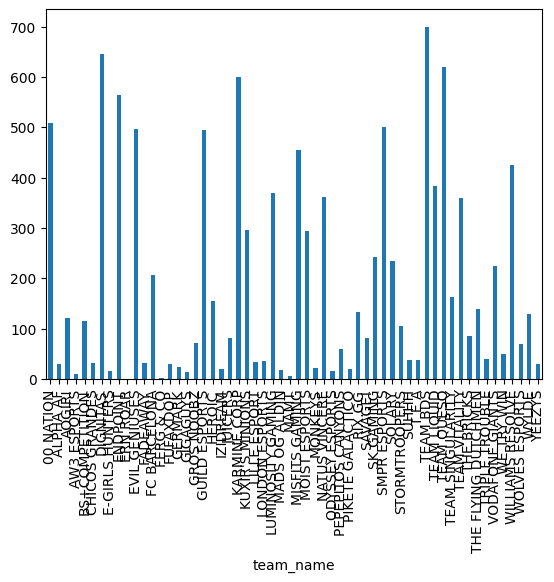

In [33]:
#SHOW EU TEAMS BY YEAH...
grouped_df = eu.groupby("team_name")
team_goals = grouped_df["core_goals"].sum()
team_goals.plot(kind="bar",y="goals")
plt.show()
# plt.bar(eu['team_name'],eu['core_goals'])

In [35]:
df.team_name.unique().size

647

In [34]:
#BDS IN REGIONALS ONE
reg1=eu.loc[eu['Mode'] == 'Regional 1']
reg1

,Mode,match_id,color,team_id,team_slug,team_name,team_region,core_shots,core_goals,core_saves,...,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,score,winner
660,Regional 1,6160626af8090ec745286fe6,blue,6020bd98f1e4807cc700dc74,https://octane.gg/teams/dc74-team-bds,TEAM BDS,Europe,32.0,12.0,10.0,...,1077.75,765.41,1897.49,1293.56,2467.60,723.44,8.0,9.0,3.0,True
661,Regional 1,6160626af8090ec745286fe6,orange,6074990c8c85ced5f379e9e0,https://octane.gg/teams/e9e0-bs-competition,BS+COMPETITION,Europe,16.0,4.0,15.0,...,975.02,505.95,2255.54,939.43,2168.24,1026.73,9.0,8.0,0.0,False
662,Regional 1,6160626af8090ec745286fe7,blue,6020c370f1e4807cc702fc9c,https://octane.gg/teams/fc9c-team-vitality,TEAM VITALITY,Europe,37.0,9.0,17.0,...,1938.59,1110.95,3680.79,2000.61,4338.66,1342.76,14.0,21.0,3.0,True
663,Regional 1,6160626af8090ec745286fe7,orange,613b735bf8090ec7452851a8,https://octane.gg/teams/51a8-00-nation,00 NATION,Europe,30.0,8.0,22.0,...,1865.92,1001.15,3847.16,1855.03,4115.78,1586.38,21.0,14.0,2.0,False
664,Regional 1,6160626af8090ec745286fe8,blue,60fbc5b887f814e9fbffdcbd,https://octane.gg/teams/dcbd-karmine-corp,KARMINE CORP,Europe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,True
665,Regional 1,6160626af8090ec745286fe8,orange,6020bc70f1e4807cc70023d9,https://octane.gg/teams/23d9-endpoint,ENDPOINT,Europe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,False
666,Regional 1,6160626af8090ec745286fe9,blue,6020bc70f1e4807cc70023a4,https://octane.gg/teams/23a4-vodafone-giants,VODAFONE GIANTS,Europe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,False
667,Regional 1,6160626af8090ec745286fe9,orange,6020c2b7f1e4807cc702ac15,https://octane.gg/teams/ac15-team-queso,TEAM QUESO,Europe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,True
668,Regional 1,6160626af8090ec745286fea,blue,6020bc70f1e4807cc70023e9,https://octane.gg/teams/23e9-dignitas,DIGNITAS,Europe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,False
1056,Regional 1,616d9217143c37878b239b33,blue,60fbc5b887f814e9fbffdcbd,https://octane.gg/teams/dcbd-karmine-corp,KARMINE CORP,Europe,61.0,15.0,34.0,...,2504.66,1663.73,4668.05,2891.65,5669.71,1890.00,18.0,17.0,4.0,True
